In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
sample = pd.read_csv('sample_submission_steel.csv')
test = pd.read_csv('test_steel.csv')
train = pd.read_csv('train_steel.csv')

print('The dimensions of the train dataset is: ', train.shape)
print('The dimensions of the test dataset is: ', test.shape)

The dimensions of the train dataset is:  (19219, 35)
The dimensions of the test dataset is:  (12814, 28)


In [3]:
train.columns, test.columns

(Index(['id', 'X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
        'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
        'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
        'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
        'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
        'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
        'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
        'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
        'Dirtiness', 'Bumps', 'Other_Faults'],
       dtype='object'),
 Index(['id', 'X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
        'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
        'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
        'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
        'Edges_Index', 'Empty_Index', 

In [4]:
train.head()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,...,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,...,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1


In [5]:
test.head()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,19219,1015,1033,3826564,3826588,659,23,46,62357,67,...,0.0095,0.5652,1.0000,1.0,2.8410,1.1139,1.6628,0.6727,-0.2261,0.9172
1,19220,1257,1271,419960,419973,370,26,28,39293,92,...,0.0047,0.2414,1.0000,1.0,2.5682,0.9031,1.4472,0.9063,-0.1453,0.9104
2,19221,1358,1372,117715,117724,289,36,32,29386,101,...,0.0155,0.6000,0.7500,0.0,2.4609,1.3222,1.3222,-0.5238,-0.0435,0.6514
3,19222,158,168,232415,232440,80,10,11,8586,107,...,0.0037,0.8000,1.0000,1.0,1.9031,0.6990,1.0414,0.1818,-0.0738,0.2051
4,19223,559,592,544375,544389,140,19,15,15524,103,...,0.0158,0.8421,0.5333,0.0,2.1461,1.3222,1.1461,-0.5714,-0.0894,0.4170


In [6]:
sample.head()

,id,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,19219,0.5,0.5,0.5,0.5,0.5,0.5,0.5
1,19220,0.5,0.5,0.5,0.5,0.5,0.5,0.5
2,19221,0.5,0.5,0.5,0.5,0.5,0.5,0.5
3,19222,0.5,0.5,0.5,0.5,0.5,0.5,0.5
4,19223,0.5,0.5,0.5,0.5,0.5,0.5,0.5


In [7]:
train.isnull().sum()

id                       0
X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scatch                 0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
dtype: int64

In [8]:
test.isnull().sum()

id                       0
X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
dtype: int64

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19219 entries, 0 to 19218
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     19219 non-null  int64  
 1   X_Minimum              19219 non-null  int64  
 2   X_Maximum              19219 non-null  int64  
 3   Y_Minimum              19219 non-null  int64  
 4   Y_Maximum              19219 non-null  int64  
 5   Pixels_Areas           19219 non-null  int64  
 6   X_Perimeter            19219 non-null  int64  
 7   Y_Perimeter            19219 non-null  int64  
 8   Sum_of_Luminosity      19219 non-null  int64  
 9   Minimum_of_Luminosity  19219 non-null  int64  
 10  Maximum_of_Luminosity  19219 non-null  int64  
 11  Length_of_Conveyer     19219 non-null  int64  
 12  TypeOfSteel_A300       19219 non-null  int64  
 13  TypeOfSteel_A400       19219 non-null  int64  
 14  Steel_Plate_Thickness  19219 non-null  int64  
 15  Ed

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12814 entries, 0 to 12813
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     12814 non-null  int64  
 1   X_Minimum              12814 non-null  int64  
 2   X_Maximum              12814 non-null  int64  
 3   Y_Minimum              12814 non-null  int64  
 4   Y_Maximum              12814 non-null  int64  
 5   Pixels_Areas           12814 non-null  int64  
 6   X_Perimeter            12814 non-null  int64  
 7   Y_Perimeter            12814 non-null  int64  
 8   Sum_of_Luminosity      12814 non-null  int64  
 9   Minimum_of_Luminosity  12814 non-null  int64  
 10  Maximum_of_Luminosity  12814 non-null  int64  
 11  Length_of_Conveyer     12814 non-null  int64  
 12  TypeOfSteel_A300       12814 non-null  int64  
 13  TypeOfSteel_A400       12814 non-null  int64  
 14  Steel_Plate_Thickness  12814 non-null  int64  
 15  Ed

In [11]:
train.duplicated().sum()

0

In [12]:
test.duplicated().sum()

0

In [13]:
train_log = np.log1p(train.drop('id', axis=1))
train_log

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,6.371612,6.381816,13.721170,13.721176,2.833213,2.197225,1.791759,7.729735,4.736198,4.948760,...,-0.693147,-0.010454,0.132518,0.000000,0.0,0.000000,0.693147,0.0,0.000000,0.000000
1,6.695799,6.705639,13.498538,13.498569,6.073045,3.044522,4.007333,10.702772,4.262680,4.718499,...,0.554976,-0.356246,0.667368,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.693147
2,3.688879,5.262690,14.609442,14.609473,9.340403,6.559615,6.042633,14.086600,3.401197,4.955827,...,-0.010556,-0.099158,0.693147,0.000000,0.0,0.693147,0.000000,0.0,0.000000,0.000000
3,6.661855,6.672033,15.025410,15.025418,5.351858,2.833213,3.401197,8.071843,4.744932,4.905275,...,0.510846,-0.041030,0.338256,0.000000,0.0,0.693147,0.000000,0.0,0.000000,0.000000
4,7.340187,7.353082,13.334985,13.335057,6.257668,4.290459,4.219508,10.783778,4.418841,4.718499,...,0.650135,-0.281700,0.693047,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.693147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,6.620073,6.630683,11.872074,11.872137,2.890372,1.609438,1.609438,7.693482,4.812184,4.948760,...,-0.154201,0.004390,0.254720,0.000000,0.0,0.000000,0.693147,0.0,0.000000,0.000000
19215,6.584791,6.601230,14.727203,14.727208,5.446737,2.890372,3.295837,10.208617,4.653960,4.897840,...,0.543603,-0.104139,0.430353,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.693147
19216,1.945910,3.465736,14.271704,14.271751,6.660575,4.744932,4.595120,11.172025,3.737670,4.553877,...,0.572052,-0.559141,0.692997,0.693147,0.0,0.000000,0.000000,0.0,0.000000,0.000000
19217,2.302585,2.944439,14.353858,14.353865,4.844187,2.639057,3.295837,9.602990,4.488636,4.890349,...,0.673455,-0.123524,0.300771,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.693147


In [14]:
# # Select only numeric columns
# numeric_df_train = train.select_dtypes(include='number')

# # Compute the correlation matrix
# correlation_matrix = numeric_df_train.corr()

# # Create a heatmap to visualize the correlation matrix
# plt.figure(figsize=(25, 15))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# plt.title('Correlation Plot', fontsize=22)  
# plt.tight_layout()  
# plt.show()

Text(0.5, 0, 'Frequncy')

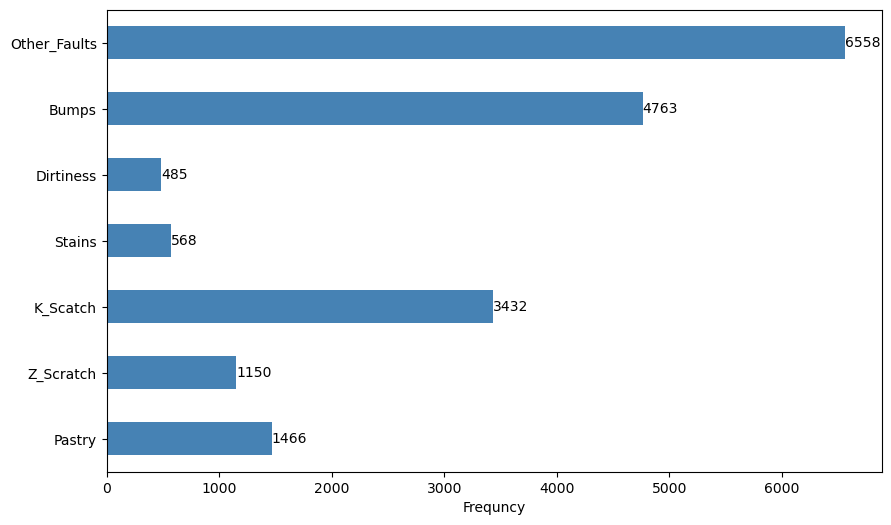

In [15]:
ax = train[['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']].sum(axis=0).plot(kind='barh', color='steelblue', figsize=(10, 6))
ax.bar_label(ax.containers[0], label_type='edge')
plt.xlabel('Frequncy')

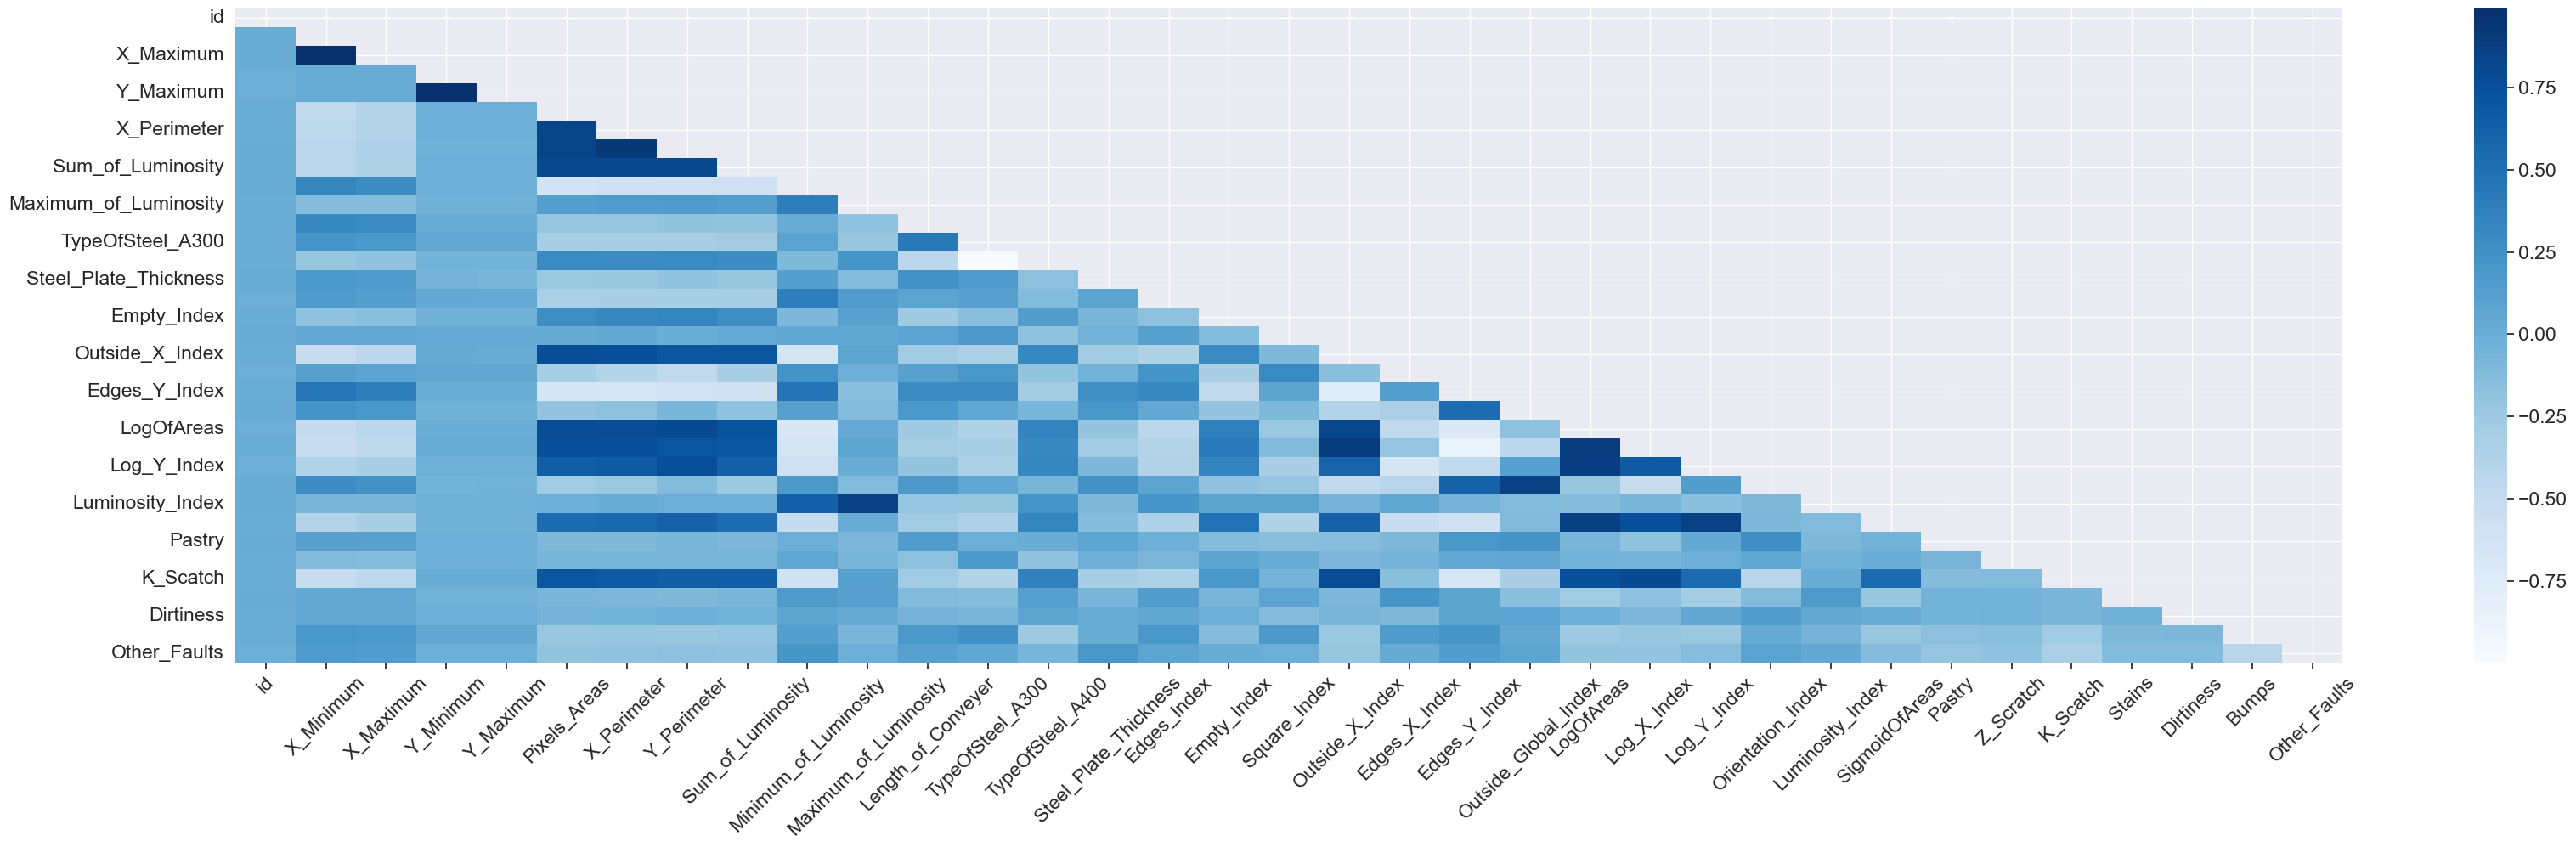

In [16]:
plt.figure(figsize=(40, 10))
k=34
corr = train.corr()
cm = np.corrcoef(train.values.T)
sns.set_theme(font_scale=1.5)
mask = np.triu(np.ones_like(corr, dtype=bool))
hm = sns.heatmap(corr, mask=mask, cbar=True, annot=True,fmt='.2f', annot_kws={'size': 10}, xticklabels=train.columns, cmap='Blues')
hm.xaxis.set_ticks_position('bottom')
plt.xticks(rotation=45, ha='center')
plt.show()

In [17]:
targets = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults']
train_cols = [column for column in train.columns if column not in targets + ['id']]
train_cols

['X_Minimum',
 'X_Maximum',
 'Y_Minimum',
 'Y_Maximum',
 'Pixels_Areas',
 'X_Perimeter',
 'Y_Perimeter',
 'Sum_of_Luminosity',
 'Minimum_of_Luminosity',
 'Maximum_of_Luminosity',
 'Length_of_Conveyer',
 'TypeOfSteel_A300',
 'TypeOfSteel_A400',
 'Steel_Plate_Thickness',
 'Edges_Index',
 'Empty_Index',
 'Square_Index',
 'Outside_X_Index',
 'Edges_X_Index',
 'Edges_Y_Index',
 'Outside_Global_Index',
 'LogOfAreas',
 'Log_X_Index',
 'Log_Y_Index',
 'Orientation_Index',
 'Luminosity_Index',
 'SigmoidOfAreas']

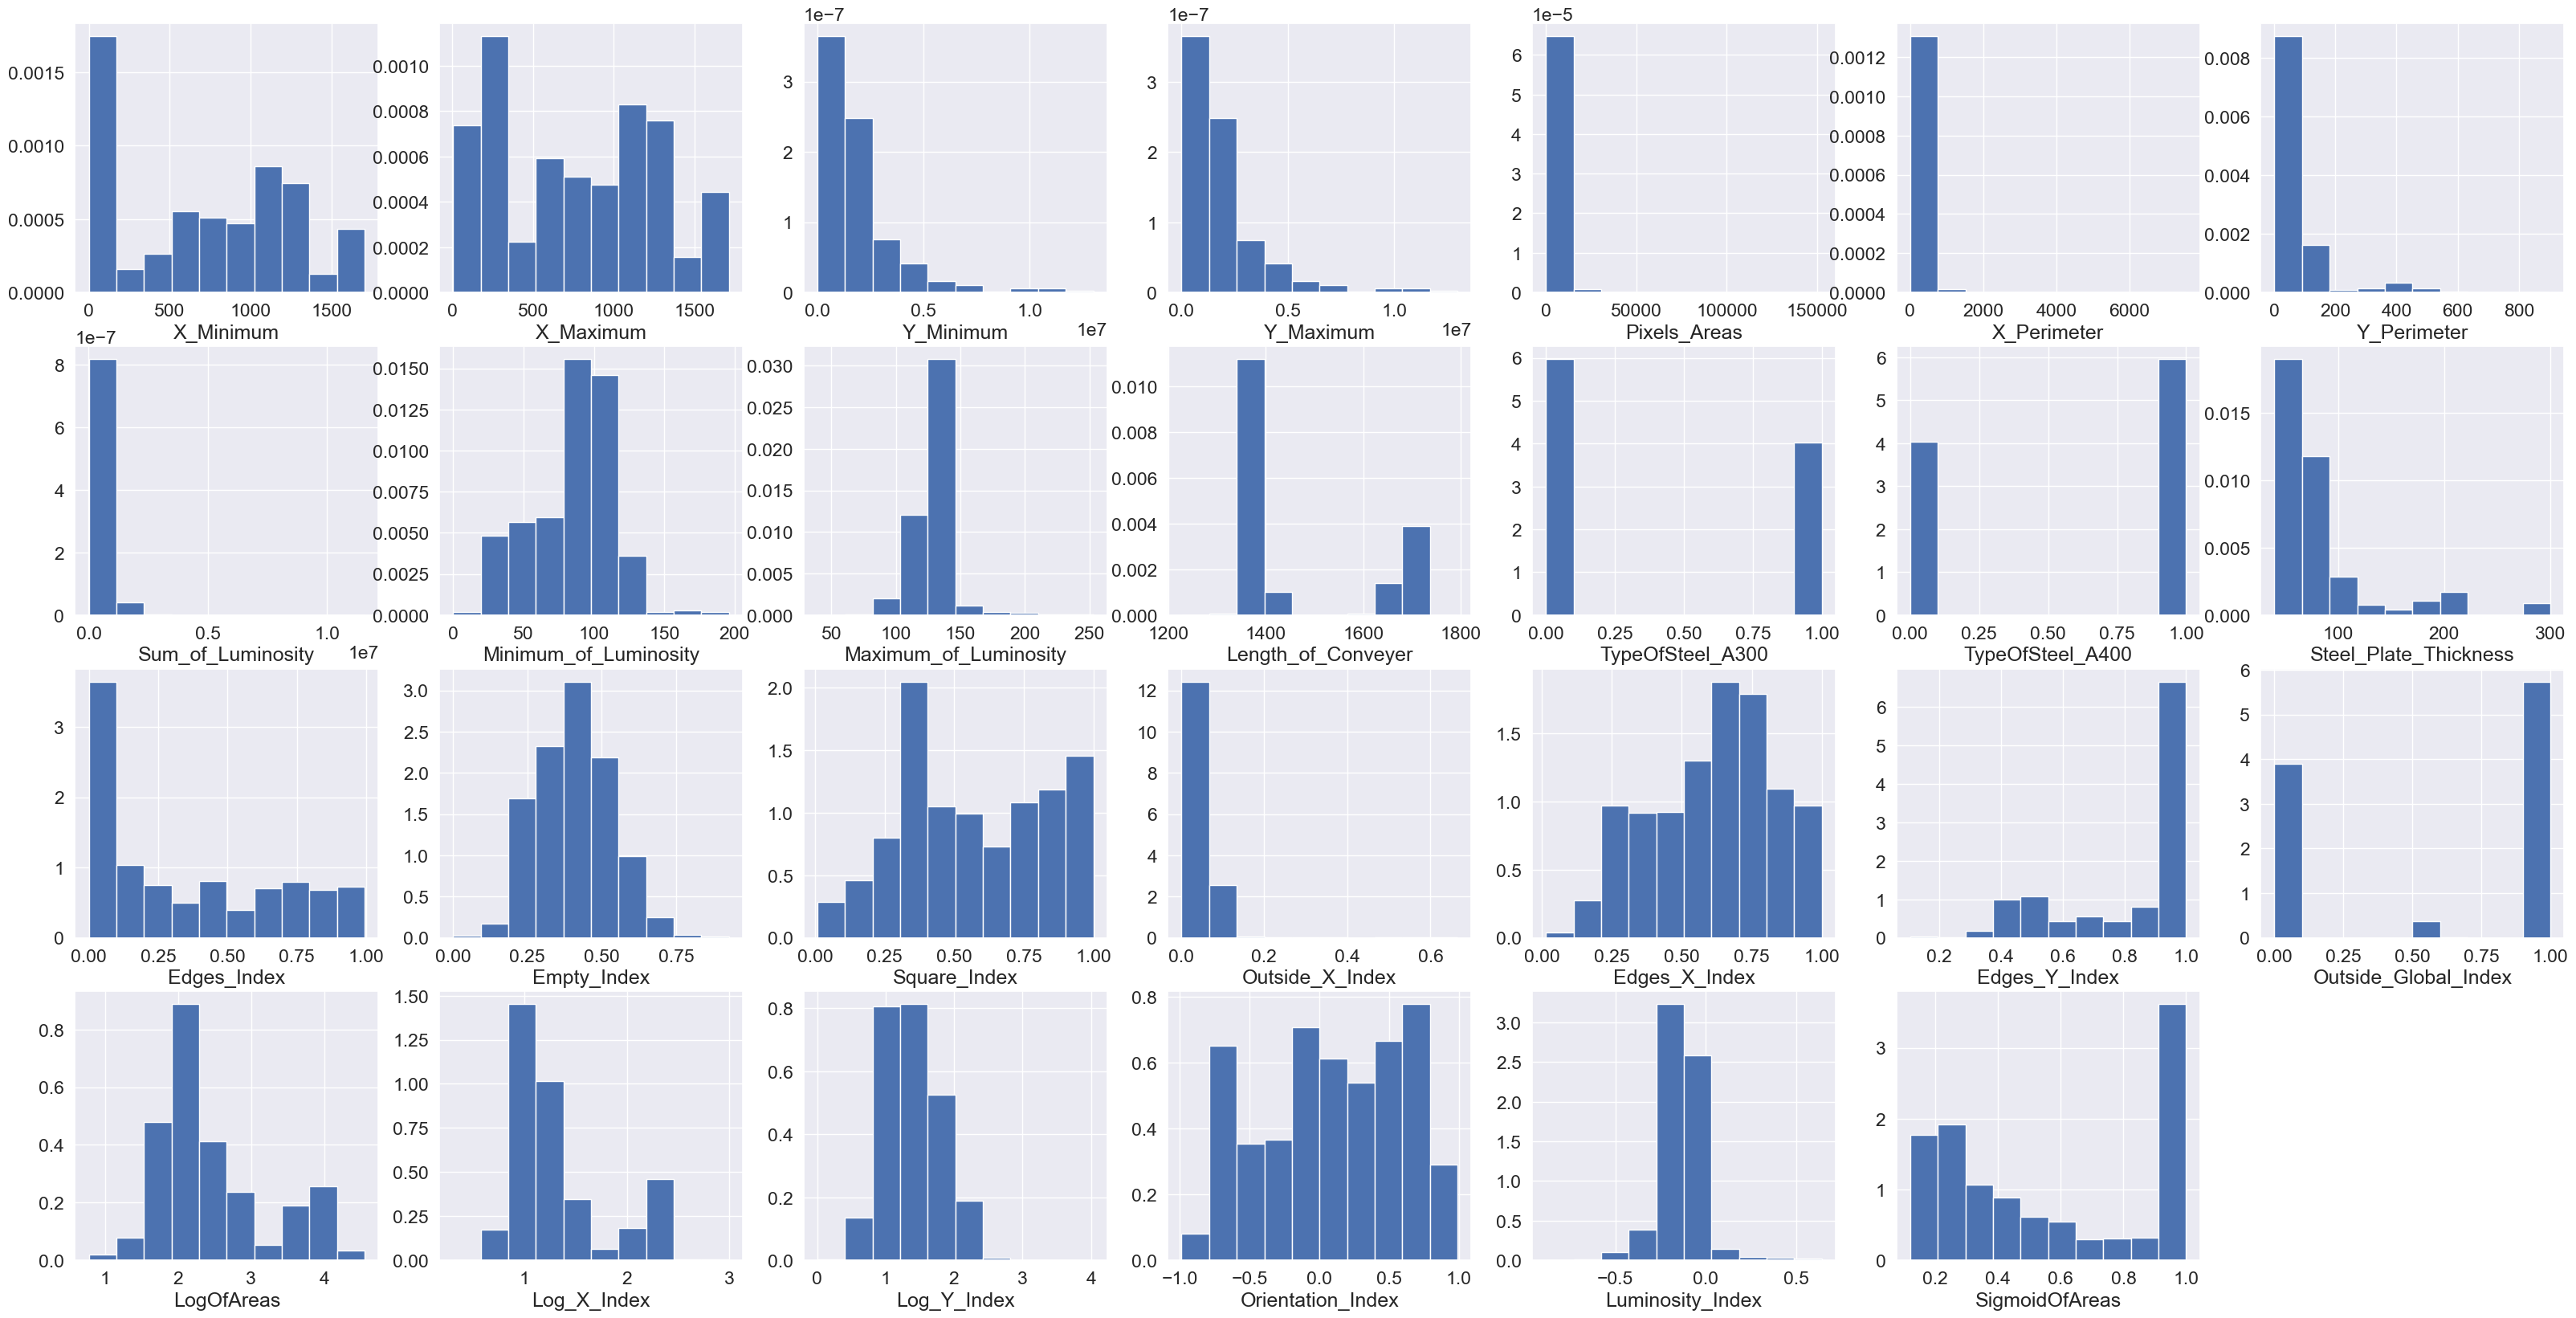

In [18]:
plt.figure(figsize=(40, 20))

for index, col in enumerate(train.iloc[:, 1:-7].columns, start=1):
    plt.subplot(4, 7, index)
    plt.hist(train[col], density=True)
    plt.xlabel(col)
    
plt.show()

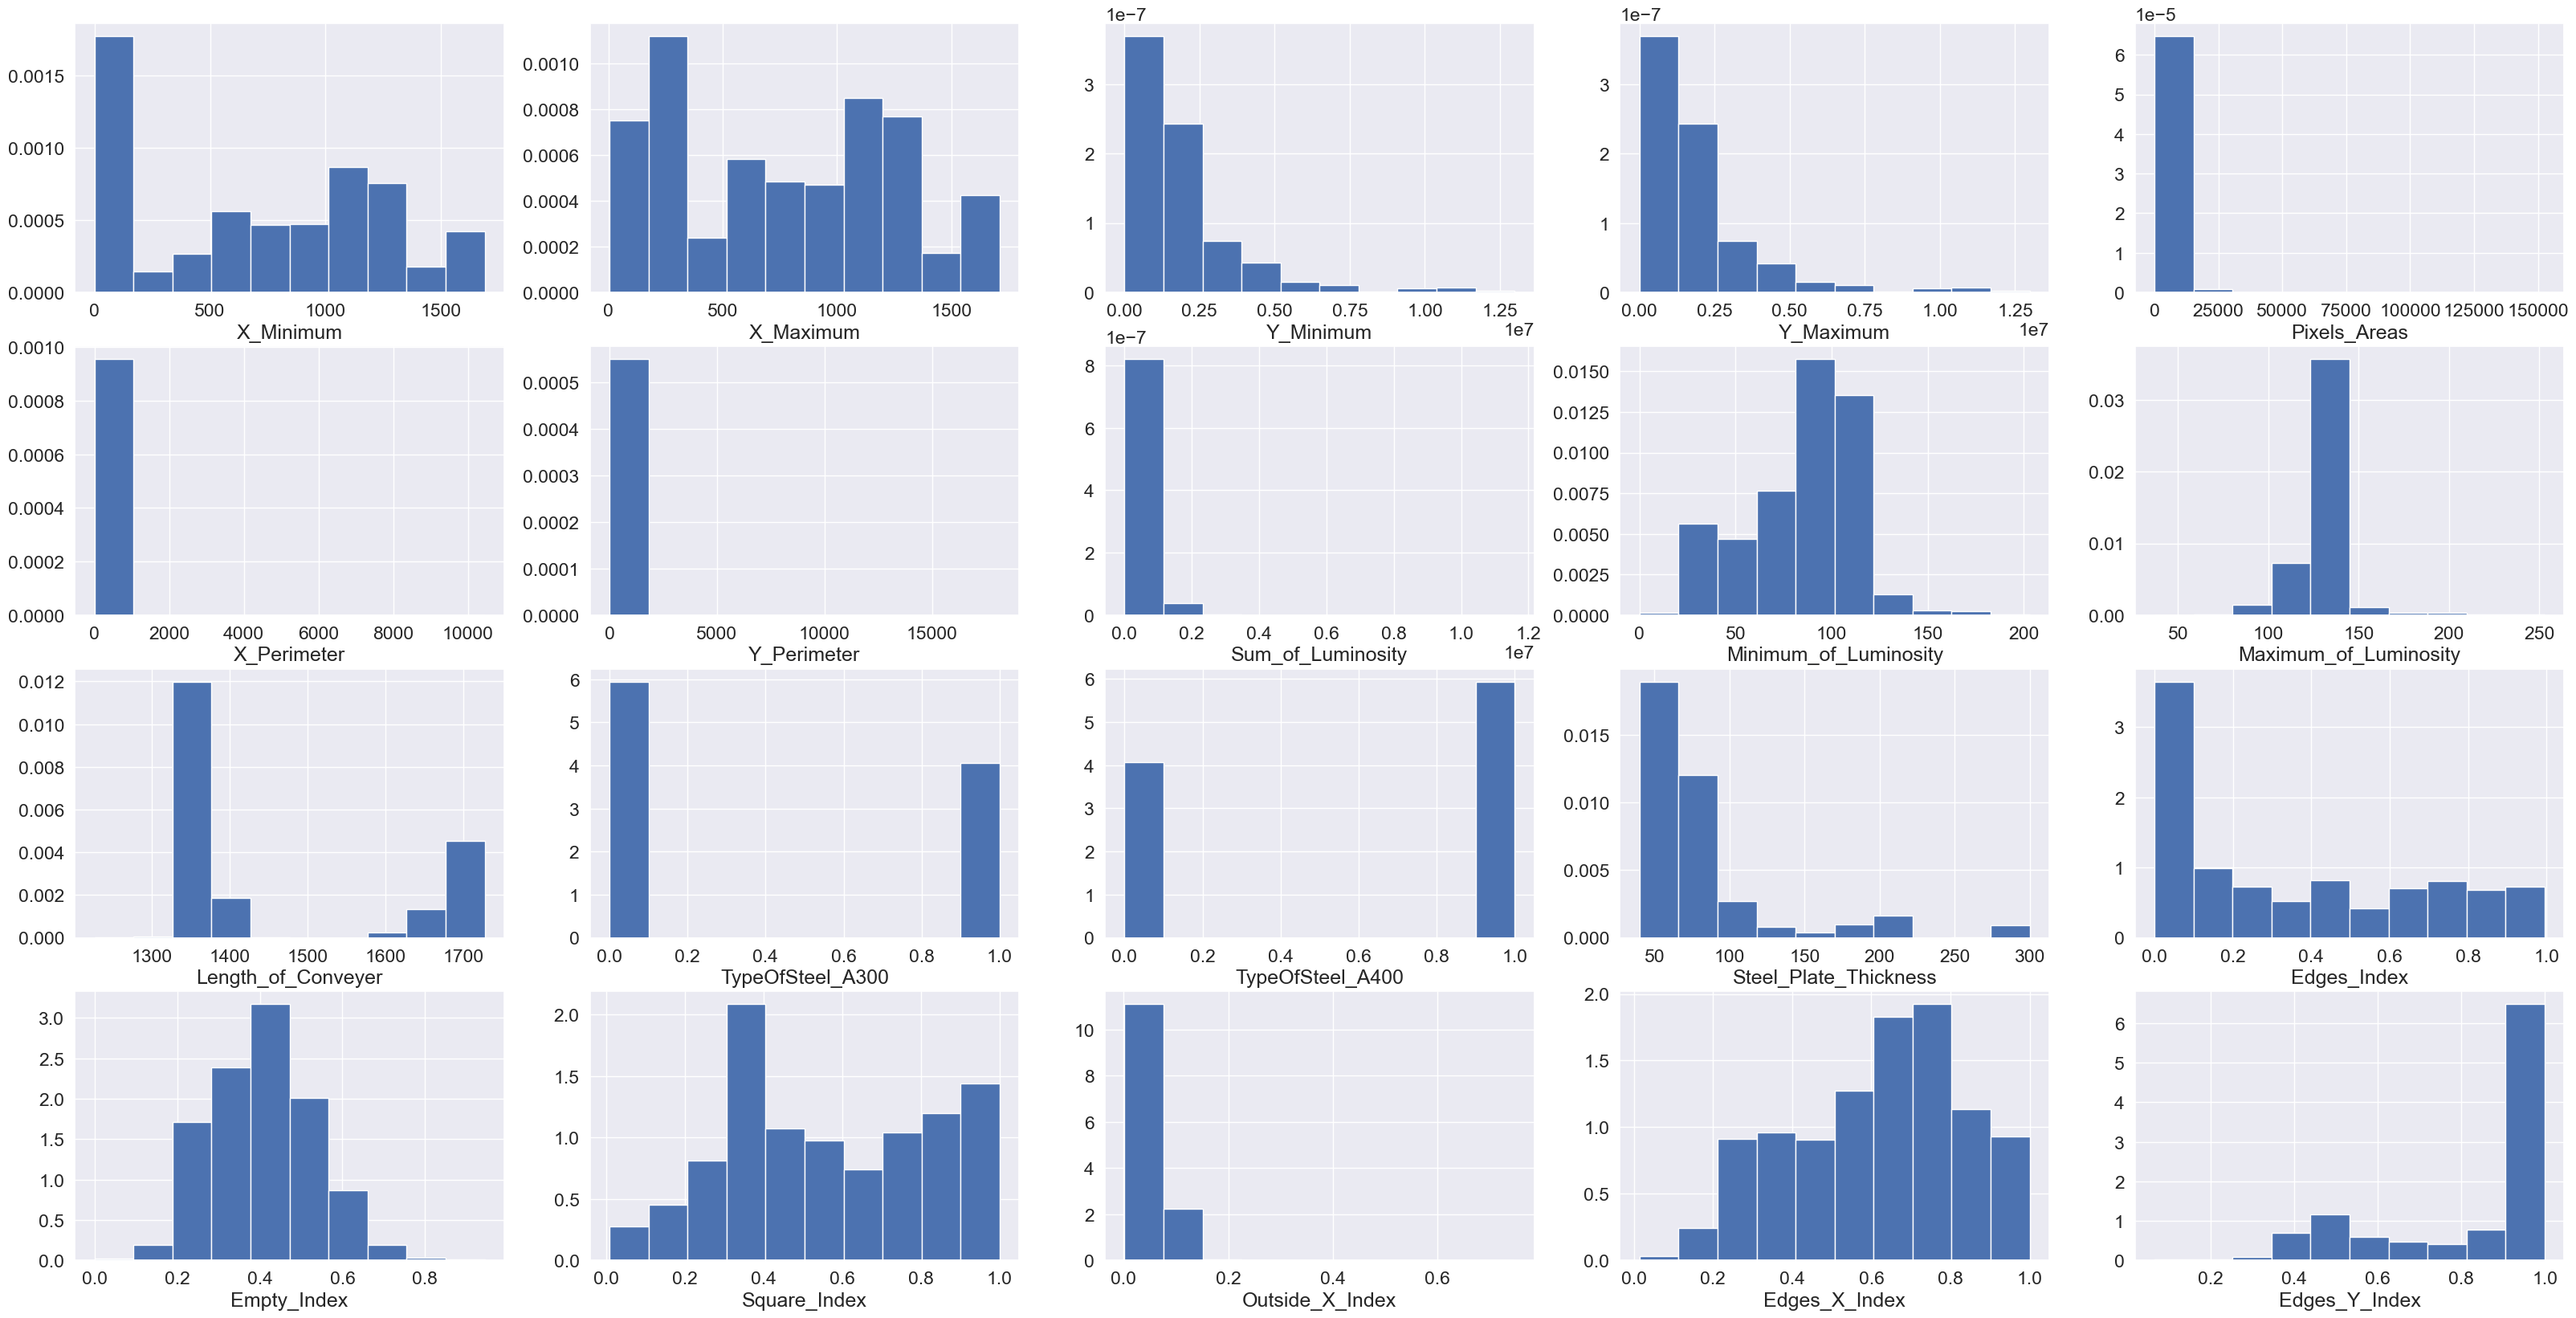

In [19]:
plt.figure(figsize=(40, 20))

for index, cols in enumerate(test.iloc[:, 1:-7].columns, start=1):
    plt.subplot(4, 5, index)
    plt.hist(test[cols], density=True)
    plt.xlabel(cols)
    
plt.show()

In [20]:
num_cols = train.select_dtypes(include=['int']).columns
num_cols

Index(['id', 'X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps',
       'Other_Faults'],
      dtype='object')

In [21]:
num_cols_t = test.select_dtypes(include=['int']).columns
num_cols_t

Index(['id', 'X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness'],
      dtype='object')

In [22]:
from sklearn.preprocessing import QuantileTransformer
nqt = QuantileTransformer(output_distribution='normal')

for col in num_cols:
    train[col] = nqt.fit_transform(train[[col]])

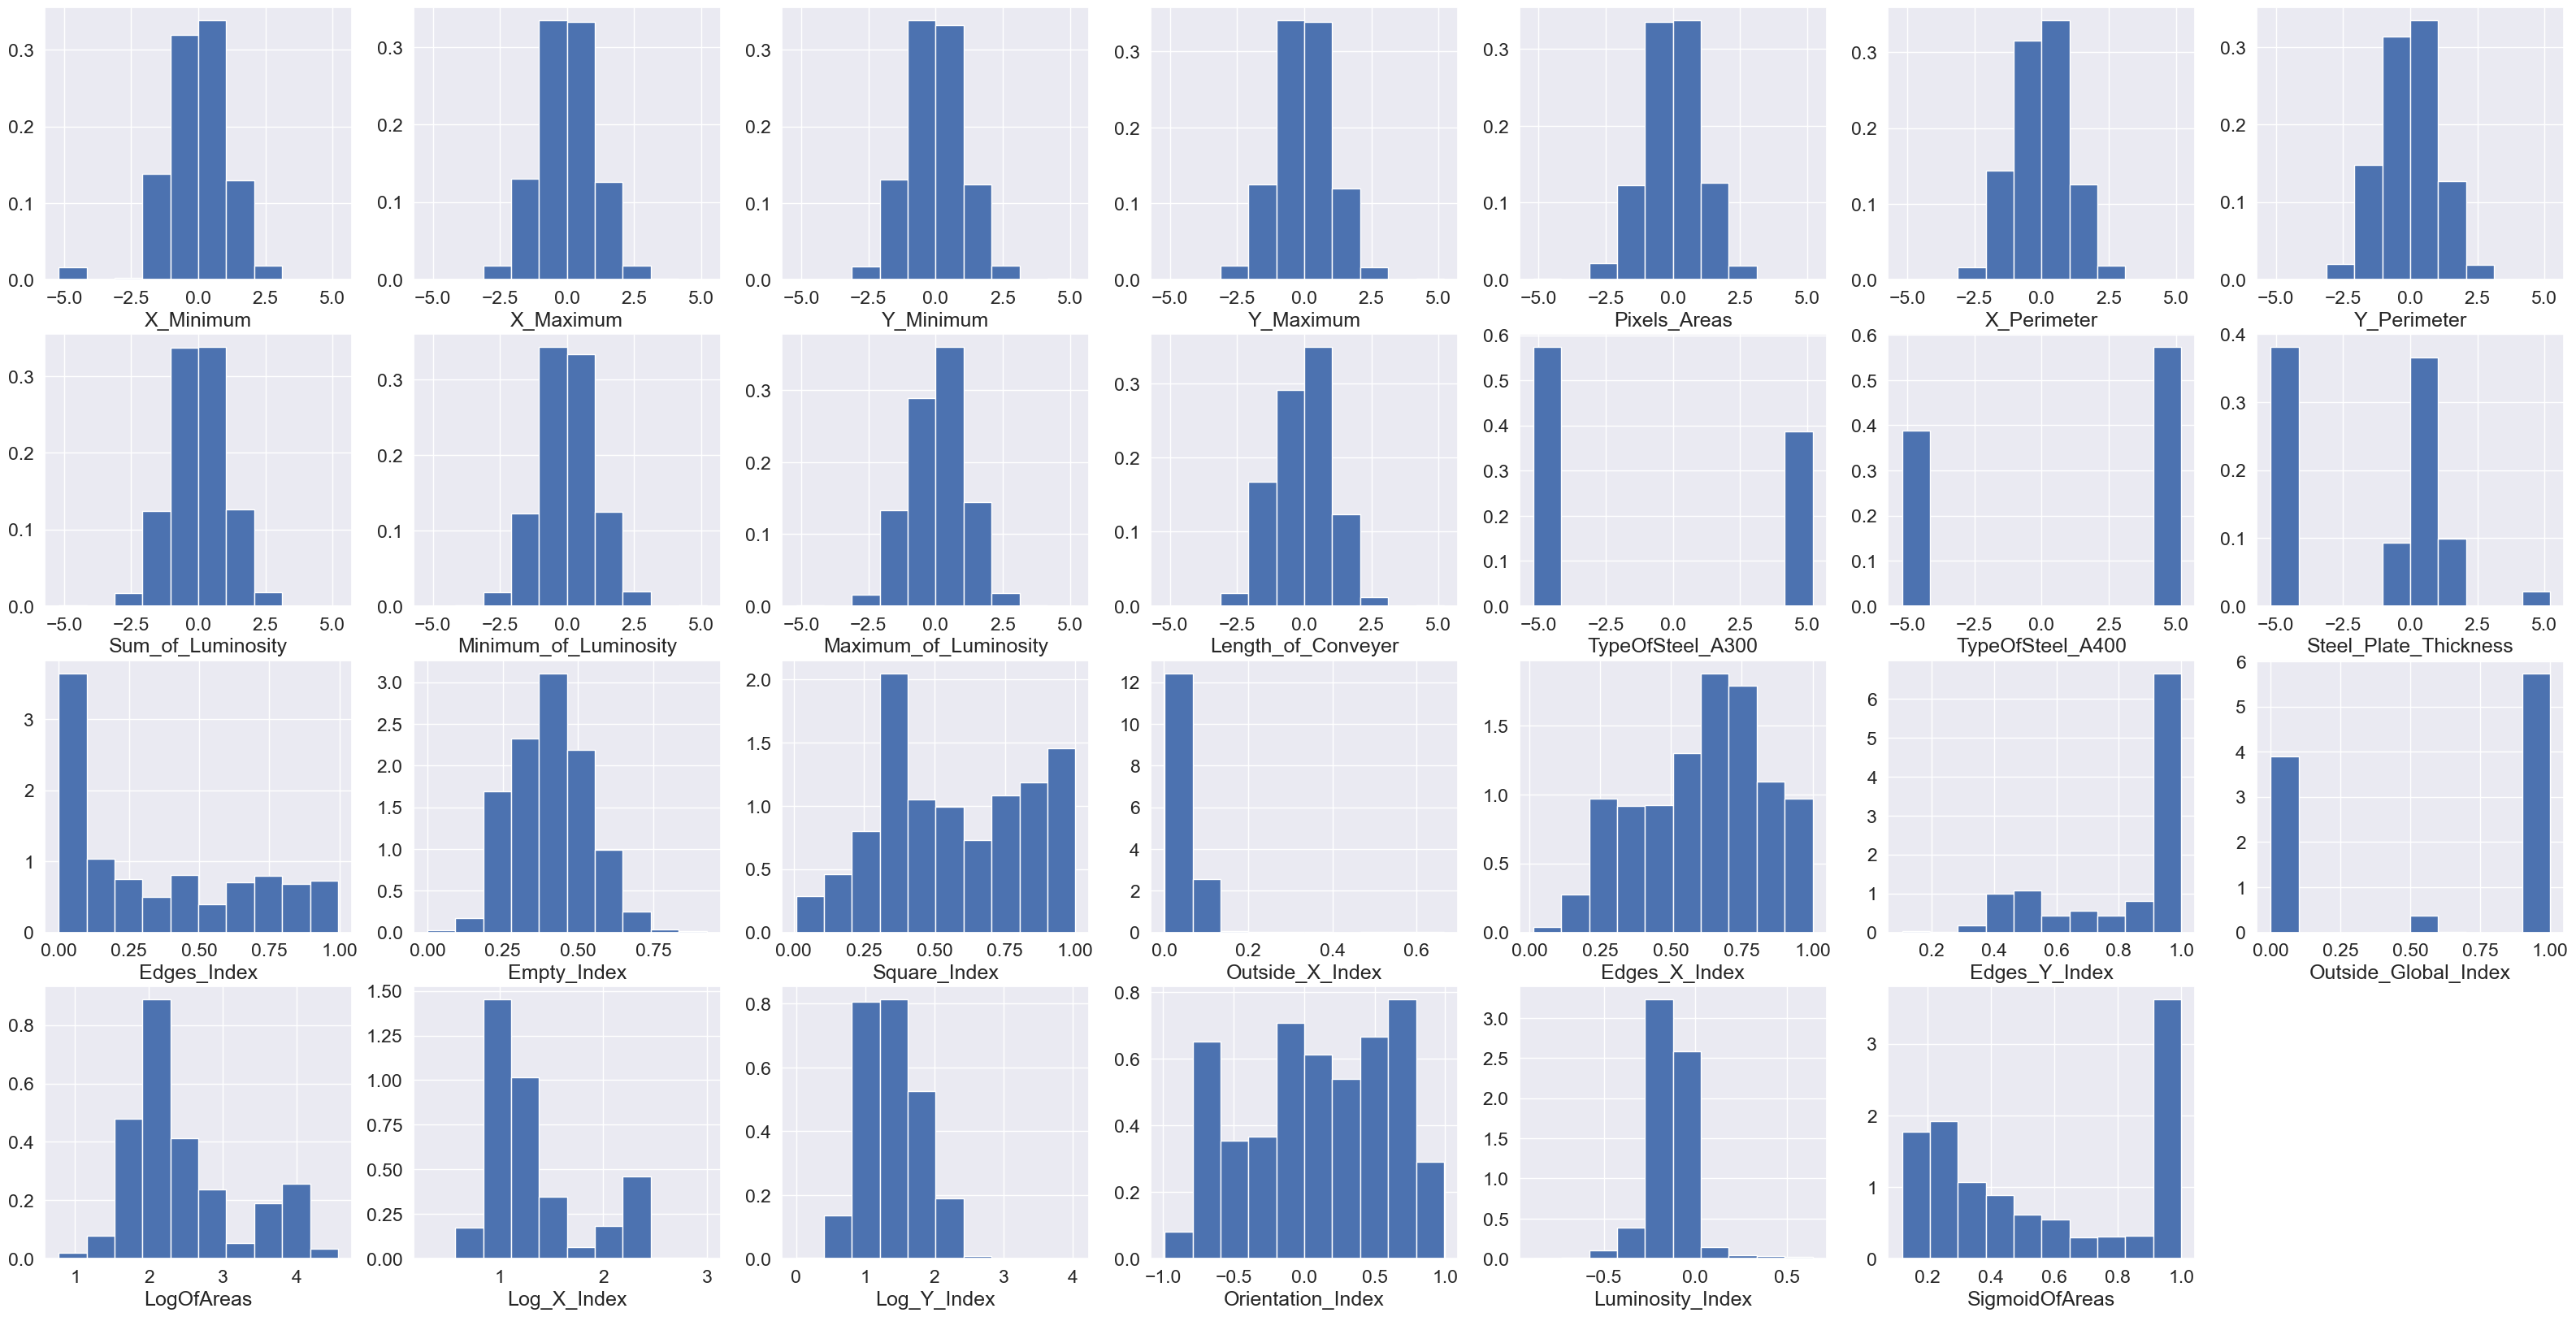

In [23]:
plt.figure(figsize=(40, 20))

for index, col in enumerate(train.iloc[:, 1:-7].columns, start=1):
    plt.subplot(4, 7, index)
    plt.hist(train[col], density=True)
    plt.xlabel(col)
    
plt.show()